## ProNet constrained dataset augmentation - Processed dataset evaluation without staggered training approach


https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720



In [0]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#set randomness for reproducibility
from numpy.random import seed
seed(8) #1
from tensorflow import set_random_seed
set_random_seed(7) #2

#

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


#TRAINING SETS########################################
#!gdown https://drive.google.com/uc?id=1yQrnETzru-ios7TO-Qeitmx_HHCW25W3
#!unzip pronet_new.zip

#Download the training dataset- Caltech10

!gdown https://drive.google.com/uc?id=1pvvYjBoYWWW118RSY3wmwvsoraJjl6hU
!unzip preprocessed_Caltech.zip


Streaming output truncated to the last 5000 lines.
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0007_20percent.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0007.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0002_40percent.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0029_40percent.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0015_20percent.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0010_60percent.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0028_20percent.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0018_60percent.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0028.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0009.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophone/image_0034_60percent.jpg  
  inflating: content/CaltechDataset/Caltech101/saxophon

In [0]:
print(os.listdir("/content/"))

#Print and remove zips once done


!rm preprocessed_Caltech.zip

['.config', 'preprocessed_Caltech.zip', 'content', 'sample_data']
rm: cannot remove 'CaltechDataset_separated_15.zip': No such file or directory


In [0]:
from os import listdir
data_list = listdir('/content/content/CaltechDataset/Caltech101')

#Delete some classes that may interfere


data_list

['garfield',
 'tick',
 'Faces',
 'dragonfly',
 'Faces_easy',
 'pagoda',
 'scissors',
 'laptop',
 'ceiling_fan',
 'windsor_chair',
 'dolphin',
 'lotus',
 'saxophone',
 'kangaroo',
 'umbrella',
 'gramophone',
 'minaret',
 'scorpion',
 'Leopards',
 'electric_guitar',
 'brain',
 'ant',
 'metronome',
 'ketch',
 'ibis',
 'trilobite',
 'okapi',
 'watch',
 'barrel',
 'platypus',
 'water_lilly',
 'lobster',
 'schooner',
 'sunflower',
 'brontosaurus',
 'car_side',
 'gerenuk',
 'camera',
 'pizza',
 'cougar_face',
 'panda',
 'nautilus',
 'octopus',
 'beaver',
 'mayfly',
 'strawberry',
 'hawksbill',
 'sea_horse',
 'buddha',
 'anchor',
 'stegosaurus',
 'ewer',
 'airplanes',
 'helicopter',
 'elephant',
 'crocodile',
 'crayfish',
 'pyramid',
 'flamingo',
 'accordion',
 'hedgehog',
 'cup',
 'joshua_tree',
 'cannon',
 'bass',
 'bonsai',
 'rooster',
 'emu',
 'chair',
 'menorah',
 'wild_cat',
 'wrench',
 'dalmatian',
 'stop_sign',
 'binocular',
 'snoopy',
 'flamingo_head',
 'cougar_body',
 'pigeon',
 'sta

VGG Initialization

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf


DATASET_PATH  = '/content/content/CaltechDataset/Caltech101'
test_dir =  '/content/content/CaltechDataset/test'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 25  # try reducing batch size or freeze more layers if your GPU runs out of memory
FREEZE_LAYERS = 25  # freeze the first this many layers for training
NUM_EPOCHS    = 40
LEARNING_RATE =0.001 #start off with high rate first 0.001 #5e-4
#5e-5 #Slow learn rate as we are transfer training
DROP_OUT = .5


#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"
                                                 
                                                  )

#MAKE A TEST DATAGEN linking to separate path
#train_batches

#https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 27664 images belonging to 102 classes.
Found 6872 images belonging to 102 classes.


Layer Modification at upper layer of Resnet

In [0]:
#Simple CNN model

from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])






58892288/58889256 [==============================] - 2s 0us/step










In [0]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 102)               26214     
Total params: 16,838,310
Trainable params: 2,123,622
Non-trainable params: 14,714,688
_________________________________________________________________
None


Training

In [0]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,
#                         
                       )


1107
275
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1106/1106 [==============================] - 290s 263ms/step - loss: 1.9805 - acc: 0.5263 - val_loss: 1.6178 - val_acc: 0.5923
Epoch 2/40
1106/1106 [==============================] - 287s 259ms/step - loss: 1.2911 - acc: 0.6590 - val_loss: 1.4434 - val_acc: 0.6223
Epoch 3/40
1106/1106 [==============================] - 286s 258ms/step - loss: 1.1251 - acc: 0.6915 - val_loss: 1.4668 - val_acc: 0.6366
Epoch 4/40
1106/1106 [==============================] - 283s 256ms/step - loss: 1.0455 - acc: 0.7110 - val_loss: 1.4467 - val_acc: 0.6381
Epoch 5/40
1106/1106 [==============================] - 285s 258ms/step - loss: 0.9725 - acc: 0.7311 - val_loss: 1.4564 - val_acc: 0.6486
Epoch 6/40
1106/1106 [==============================] - 282s 255ms/step - loss: 0.9143 - acc: 0.7438 - val_loss: 1.5617 - val_acc: 0.6317
Epoch 7/40
1106/1106 [==============================] - 285s 258ms/step - loss: 0.8923 - acc: 0.7493 - val_loss: 1.4795 - val_acc: 0.6524
Epoch 8/40
1106/1106 [=======================

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


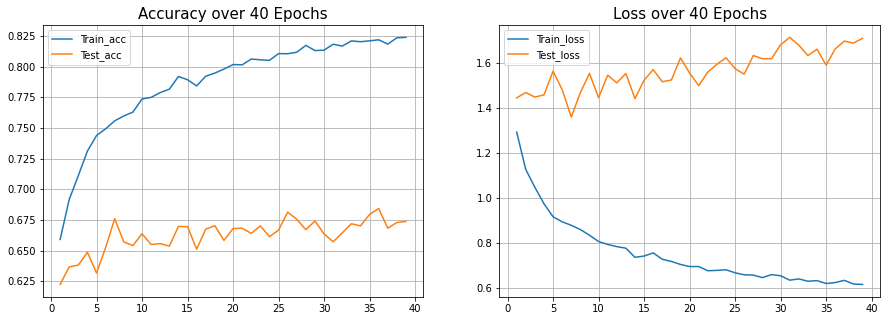

In [0]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 40)

In [0]:
#model.save('vanilla_model_100epochs_0pt0005.h5')

In [0]:
#Dont forget shuffle false
#See https://github.com/keras-team/keras/issues/6499
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=True,
        seed=42,
        
        class_mode="categorical")
eval_generator.reset()    


Found 510 images belonging to 102 classes.


Predict

In [0]:

eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])


21/21 [==============================] - 1s 39ms/step
Test loss: 2.2103774901595847
Test accuracy: 0.6190476190476191


Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1106/1106 [==============================] - 285s 257ms/step - loss: 0.4864 - acc: 0.8562 - val_loss: 1.5832 - val_acc: 0.6926
Epoch 2/20
1106/1106 [==============================] - 283s 256ms/step - loss: 0.4474 - acc: 0.8693 - val_loss: 1.5374 - val_acc: 0.6977
Epoch 3/20
1106/1106 [==============================] - 282s 255ms/step - loss: 0.4279 - acc: 0.8694 - val_loss: 1.5326 - val_acc: 0.6996
Epoch 4/20
1106/1106 [==============================] - 284s 256ms/step - loss: 0.4273 - acc: 0.8724 - val_loss: 1.5369 - val_acc: 0.6984
Epoch 5/20
1106/1106 [==============================] - 283s 256ms/step - loss: 0.4209 - acc: 0.8737 - val_loss: 1.5453 - val_acc: 0.6945
Epoch 6/20
1106/1106 [==============================] - 282s 255ms/step - loss: 0.4141 - acc: 0.8771 - val_loss: 1.5342 - val_acc: 0.7028
Epoch 7/20
1106/1106 [==============================] - 281s 254ms/step - loss: 0.4048 - acc: 0.8784 - val_loss: 1.4943 - val_acc: 0.7091
Epoch 8/20
1106/1106 [=======================

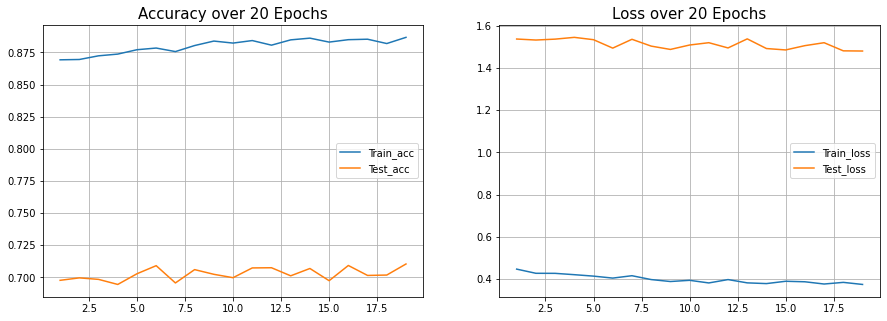

21/21 [==============================] - 0s 17ms/step
Test loss: 2.123373934672262
Test accuracy: 0.6190476190476191


In [0]:

#Continue finetune


model.compile(loss='categorical_crossentropy',
              
              optimizer=optimizers.Adam(lr=5e-5),
              metrics=['acc'])

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= 20,
                       
                       )

plot_acc_loss(result, 20)

eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])



In [0]:
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])


21/21 [==============================] - 0s 21ms/step
Test loss: 2.123373934672262
Test accuracy: 0.6190476190476191


Save